\begin{center}
Don't get kicked
\end{center}

## Introduction

The goal is to develop prediction models able to predict if the car purchased at the Auction is a good or a bad buy (IsBadBuy is the variable to predict). These bad cars are called "lemon", they have several manufacturing defects which may affect the safety, value or use of the vehicle. The government wanted to protect the population from these deceptive warranty practices and published the "lemon law" or  the Magnuson–Moss Warranty Act in 1975. The purpose of the Act was to make product warranties more easily understood and enforceable, and to provide the Federal Trade Commission with a means of better protecting consumers.

Nowadays, lots of websites develop tricks to help people to avoid the lemon. The solutions to this challenge must give the buyers some keys to buy the good cars.

The data we will manipulate is from Carvana. Carvana is an American start-up, founded in 2012. It consists on an online-only used car dealer that allows customers to shop, finance, and trade in cars through their website. 

The input contains :
* The date of the purchase
* Auction provider
* The year and age of the vehicle
* The vehicle manufacturer, model and submodel, color
* The vehicle transmission type
* The nationality of the vehicle
* The size category
* The odometer reading
* Different acquisition prices
* The acquisition type
* The warranty cost
* If the vehicle was originally purchased online
* The Zipcode and the state where the car was purchased

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   
* seaborn>=0.7.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory data analysis

### Loading the data

In [4]:
data.columns

Index(['Unnamed: 0', 'RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear',
       'VehicleAge', 'Make', 'Model', 'Trim', 'SubModel', 'Color',
       'Transmission', 'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality',
       'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [3]:
train_filename = 'data/train.csv'
data = pd.read_csv(train_filename, sep=',')
data = data.fillna('')
data['PurchDate'] = pd.to_datetime(data['PurchDate'])
print(data.shape)
data.head()

(60000, 35)


,Unnamed: 0,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,...,11597,12409,,,21973,33619,FL,7100.0,0,1113
1,1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,...,11374,12791,,,19638,33619,FL,7600.0,0,1053
2,2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,...,7146,8702,,,19638,33619,FL,4900.0,0,1389
3,3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,...,4375,5518,,,19638,33619,FL,4100.0,0,630
4,4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,...,6739,7911,,,19638,33619,FL,4000.0,0,1020


In [6]:
#On regarde le nombre de données manquantes pour ces 2 colonnes
print(np.unique(data['PRIMEUNIT']))
print(data.groupby('PRIMEUNIT').count())
if False:
    print(np.unique(data['AUCGUART']))
    print(data.groupby('AUCGUART').count())

['' 'NO' 'YES']
           Unnamed: 0  RefId  IsBadBuy  PurchDate  Auction  VehYear  \
PRIMEUNIT                                                             
                57331  57331     57331      57331    57331    57331   
NO               2622   2622      2622       2622     2622     2622   
YES                47     47        47         47       47       47   

           VehicleAge   Make  Model   Trim      ...       \
PRIMEUNIT                                       ...        
                57331  57331  57331  57331      ...        
NO               2622   2622   2622   2622      ...        
YES                47     47     47     47      ...        

           MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
PRIMEUNIT                                                              
                                 57331                         57331   
NO                                2622                          2622   
YES                                 47 

Dans les 2 cas, il manque 69564 données sur 72983 => A SUPPRIMER??

RefId => A SUPPRIMER
WheelTypeId => A SUPPRIMER
BYRNO => A SUPPRIMER

Il reste 29 variables explicatives.

In [5]:
data.dtypes

Unnamed: 0                                    int64
RefId                                         int64
IsBadBuy                                      int64
PurchDate                            datetime64[ns]
Auction                                      object
VehYear                                       int64
VehicleAge                                    int64
Make                                         object
Model                                        object
Trim                                         object
SubModel                                     object
Color                                        object
Transmission                                 object
WheelTypeID                                  object
WheelType                                    object
VehOdo                                        int64
Nationality                                  object
Size                                         object
TopThreeAmericanName                         object
MMRAcquisiti

In [6]:
data.describe()

,Unnamed: 0,RefId,IsBadBuy,VehYear,VehicleAge,VehOdo,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,30017.590900,0.118967,2005.385967,4.141883,71201.736717,27724.575867,57746.915883,6741.161060,0.027067,1277.299700
std,17320.652413,17328.587447,0.323752,1.754275,1.734897,14701.889993,27616.446576,26118.839757,1749.863625,0.162279,599.836625
min,0.000000,1.000000,0.000000,2001.000000,0.000000,4825.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,14999.750000,15009.750000,0.000000,2004.000000,3.000000,61317.000000,17212.000000,32124.000000,5470.000000,0.000000,837.000000
50%,29999.500000,30020.500000,0.000000,2006.000000,4.000000,73108.500000,19662.000000,73108.000000,6735.000000,0.000000,1155.000000
75%,44999.250000,45023.250000,0.000000,2007.000000,5.000000,82294.250000,22916.000000,80011.000000,7900.000000,0.000000,1623.000000
max,59999.000000,60028.000000,1.000000,2010.000000,9.000000,115717.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [7]:
data.count()

Unnamed: 0                           60000
RefId                                60000
IsBadBuy                             60000
PurchDate                            60000
Auction                              60000
VehYear                              60000
VehicleAge                           60000
Make                                 60000
Model                                60000
Trim                                 60000
SubModel                             60000
Color                                60000
Transmission                         60000
WheelTypeID                          60000
WheelType                            60000
VehOdo                               60000
Nationality                          60000
Size                                 60000
TopThreeAmericanName                 60000
MMRAcquisitionAuctionAveragePrice    60000
MMRAcquisitionAuctionCleanPrice      60000
MMRAcquisitionRetailAveragePrice     60000
MMRAcquisitonRetailCleanPrice        60000
MMRCurrentA

The training data frame has 72000+ instances.

There are 29 explicative variables.

['' 'AMERICAN' 'OTHER' 'OTHER ASIAN' 'TOP LINE ASIAN']
5


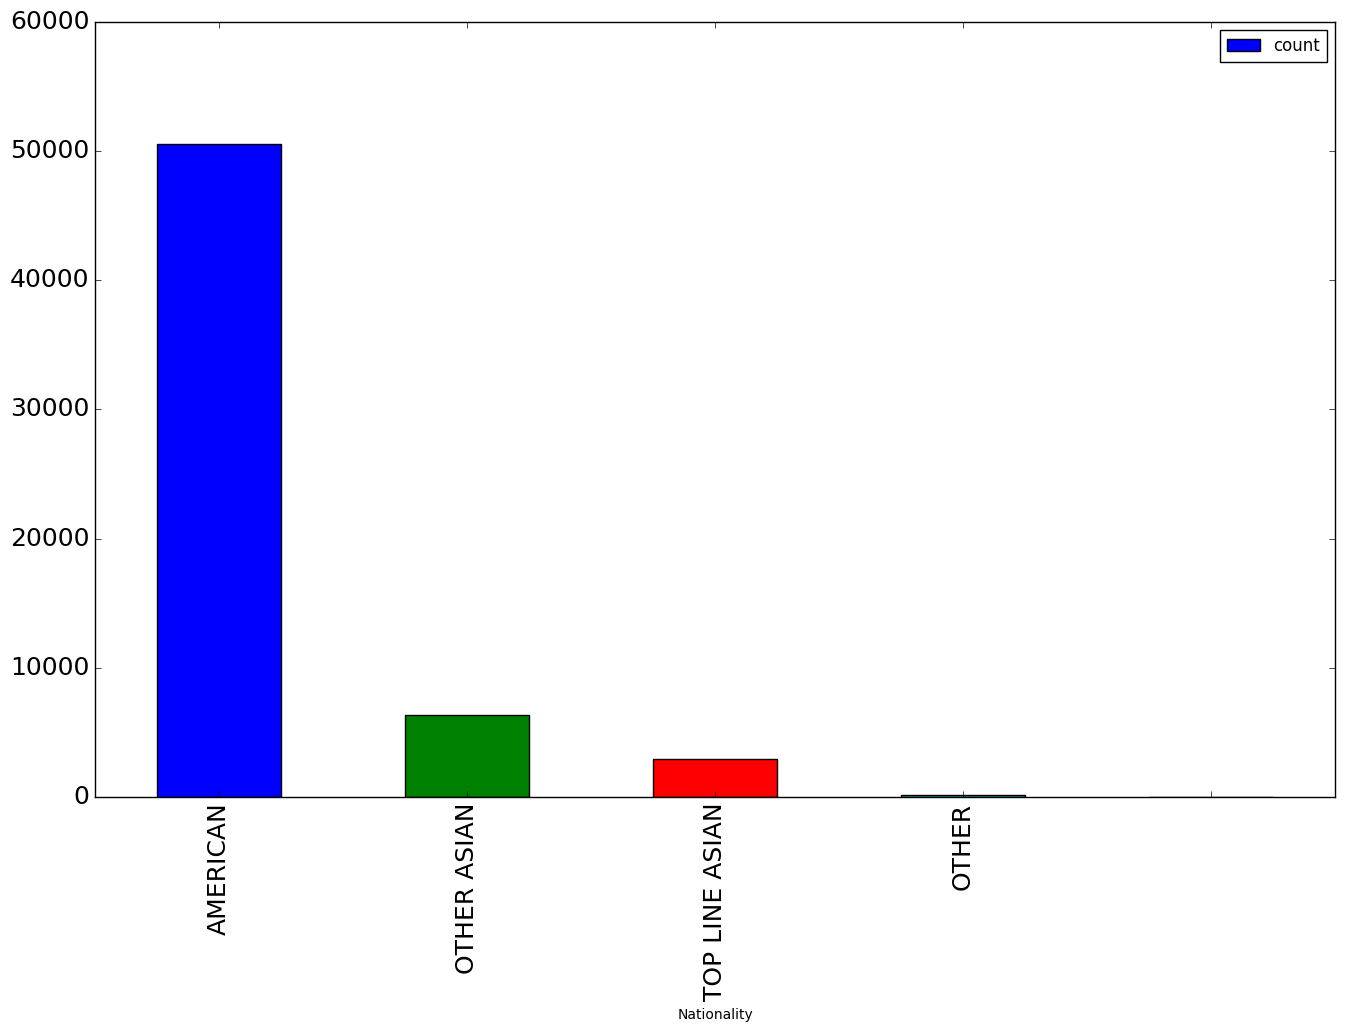

In [8]:
print(np.unique(data['Nationality']))
print(len(np.unique(data['Nationality'])))
data.groupby('Nationality').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Nationality', y='count', figsize=(16, 10), fontsize=18);

['' 'COMPACT' 'CROSSOVER' 'LARGE' 'LARGE SUV' 'LARGE TRUCK' 'MEDIUM'
 'MEDIUM SUV' 'SMALL SUV' 'SMALL TRUCK' 'SPECIALTY' 'SPORTS' 'VAN']
13


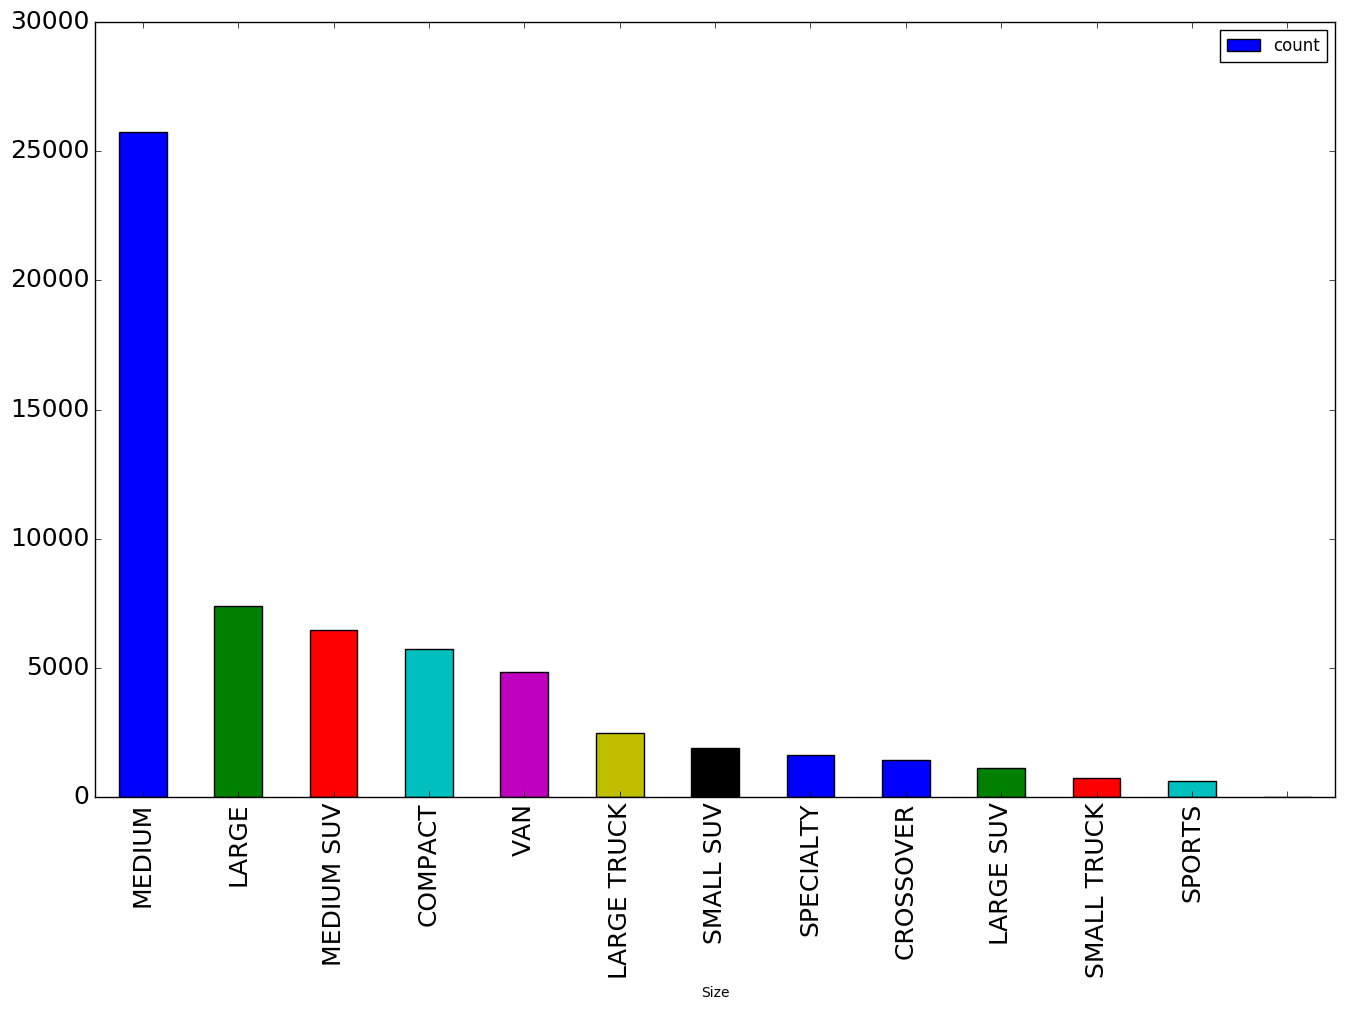

In [9]:
print(np.unique(data['Size']))
print(len(np.unique(data['Size'])))
data.groupby('Size').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Size', y='count', figsize=(16, 10), fontsize=18);

['1500 RAM PICKUP 2WD' '1500 RAM PICKUP 4WD' '1500 SIERRA PICKUP 2' ...
 'YUKON XL 1500 AWD 6.' 'ZEPHYR' 'ZEPHYR 3.0L V6 SFI']
1023


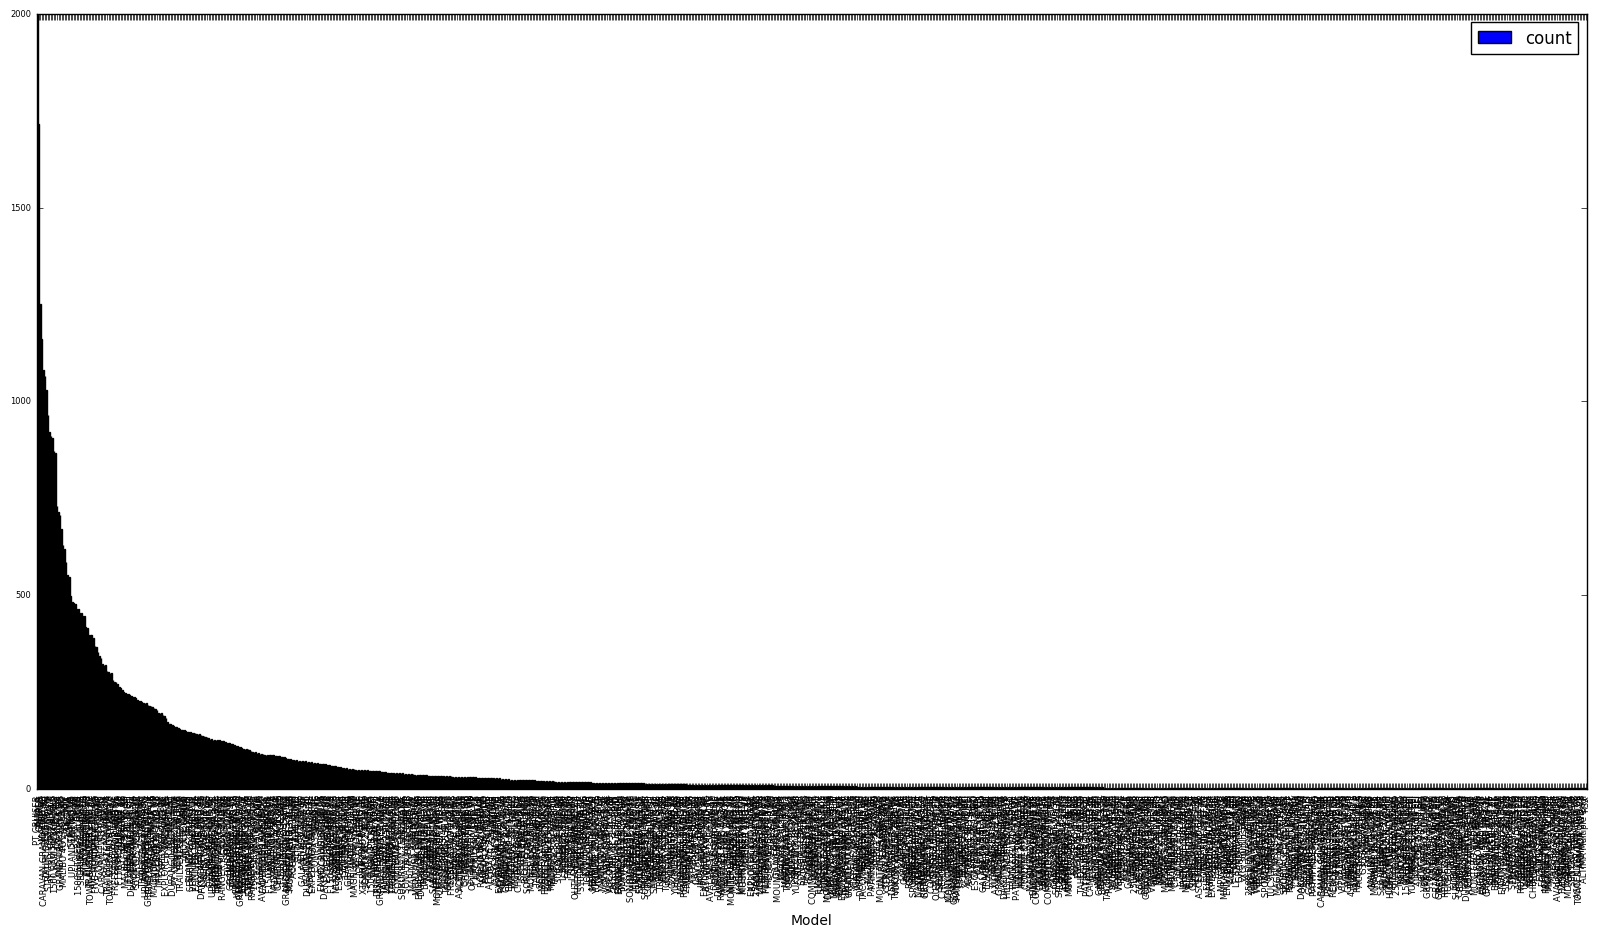

In [10]:
print(np.unique(data['Model']))
print(len(np.unique(data['Model'])))
data.groupby('Model').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Model', y='count', figsize=(20, 10), fontsize=6);

['' 'BEIGE' 'BLACK' 'BLUE' 'BROWN' 'GOLD' 'GREEN' 'GREY' 'MAROON'
 'NOT AVAIL' 'ORANGE' 'OTHER' 'PURPLE' 'RED' 'SILVER' 'WHITE' 'YELLOW']
17


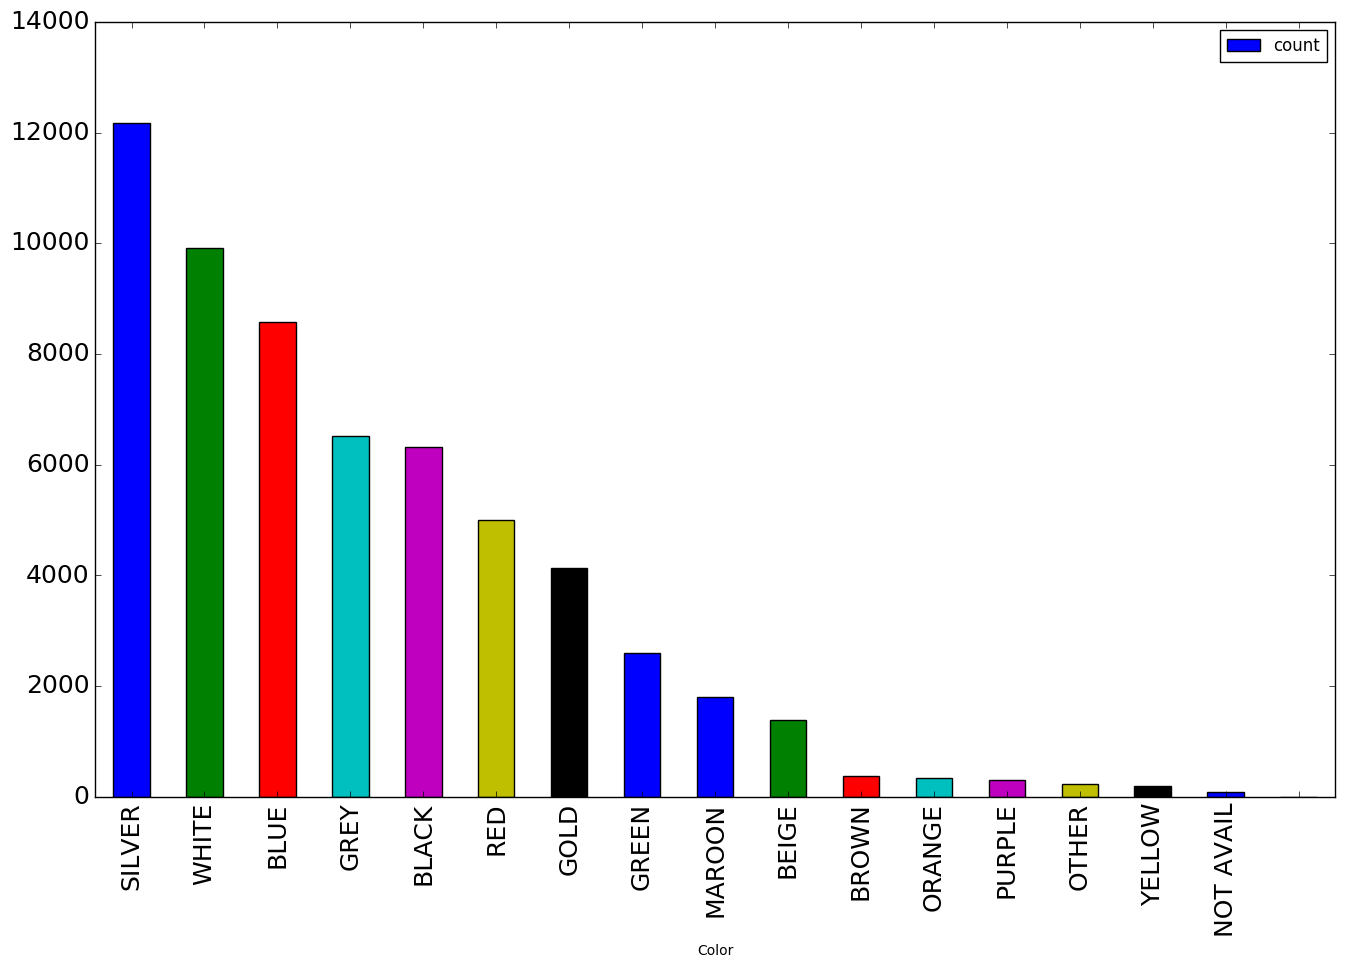

In [11]:
print(np.unique(data['Color']))
print(len(np.unique(data['Color'])))
data.groupby('Color').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='Color', y='count', figsize=(16, 10), fontsize=18);

['' 'CHRYSLER' 'FORD' 'GM' 'OTHER']
5


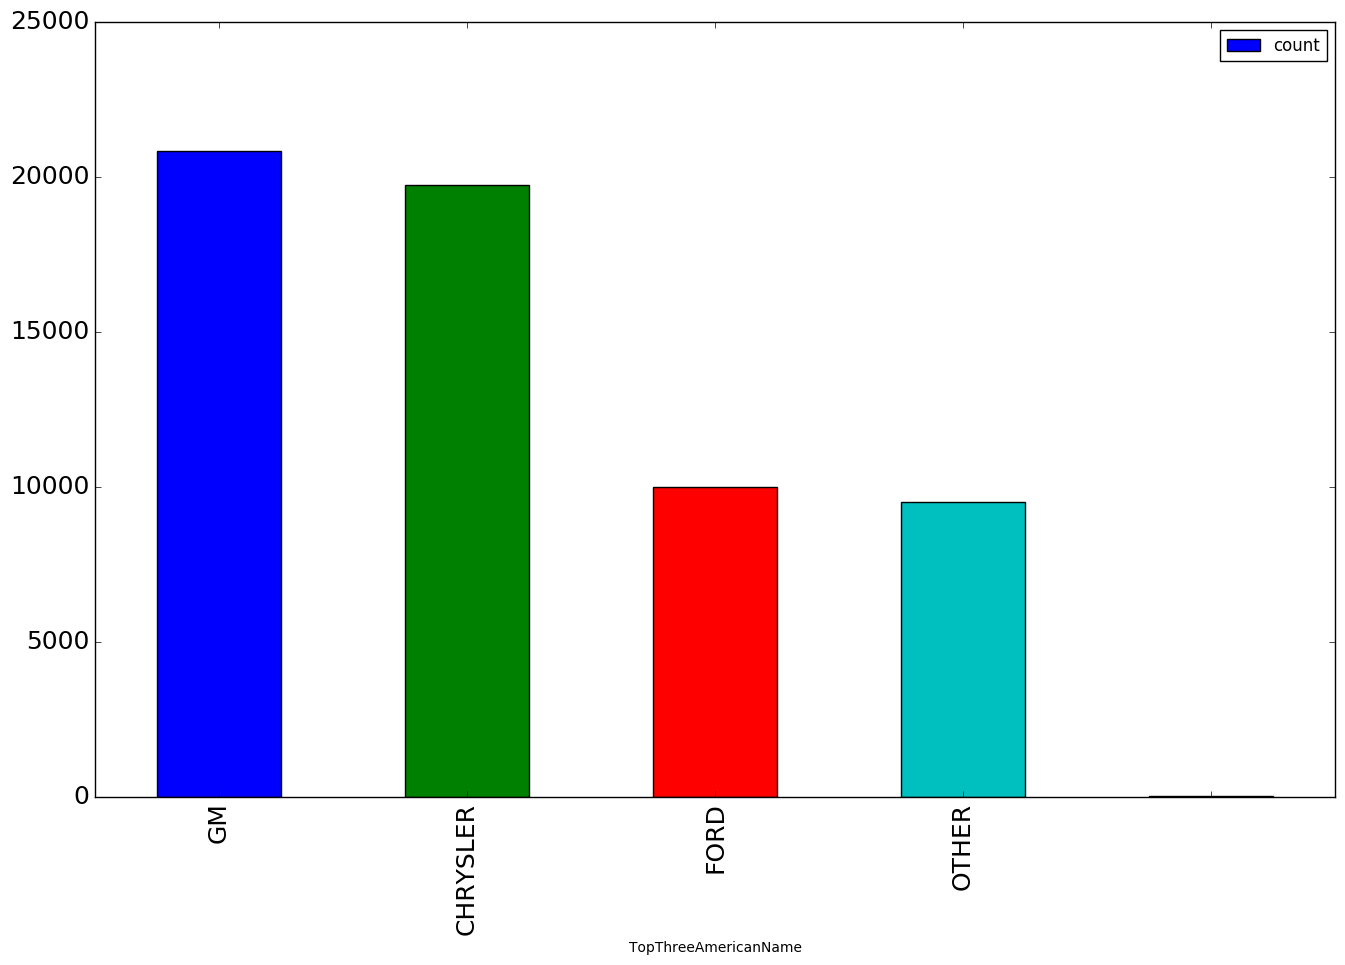

In [14]:
print(np.unique(data['TopThreeAmericanName']))
print(len(np.unique(data['TopThreeAmericanName'])))
data.groupby('TopThreeAmericanName').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='TopThreeAmericanName', y='count', figsize=(16, 10), fontsize=18);

['AL' 'AR' 'AZ' 'CA' 'CO' 'FL' 'GA' 'IA' 'ID' 'IL' 'IN' 'KY' 'LA' 'MA'
 'MD' 'MI' 'MN' 'MO' 'MS' 'NC' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK'
 'OR' 'PA' 'SC' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV']
37


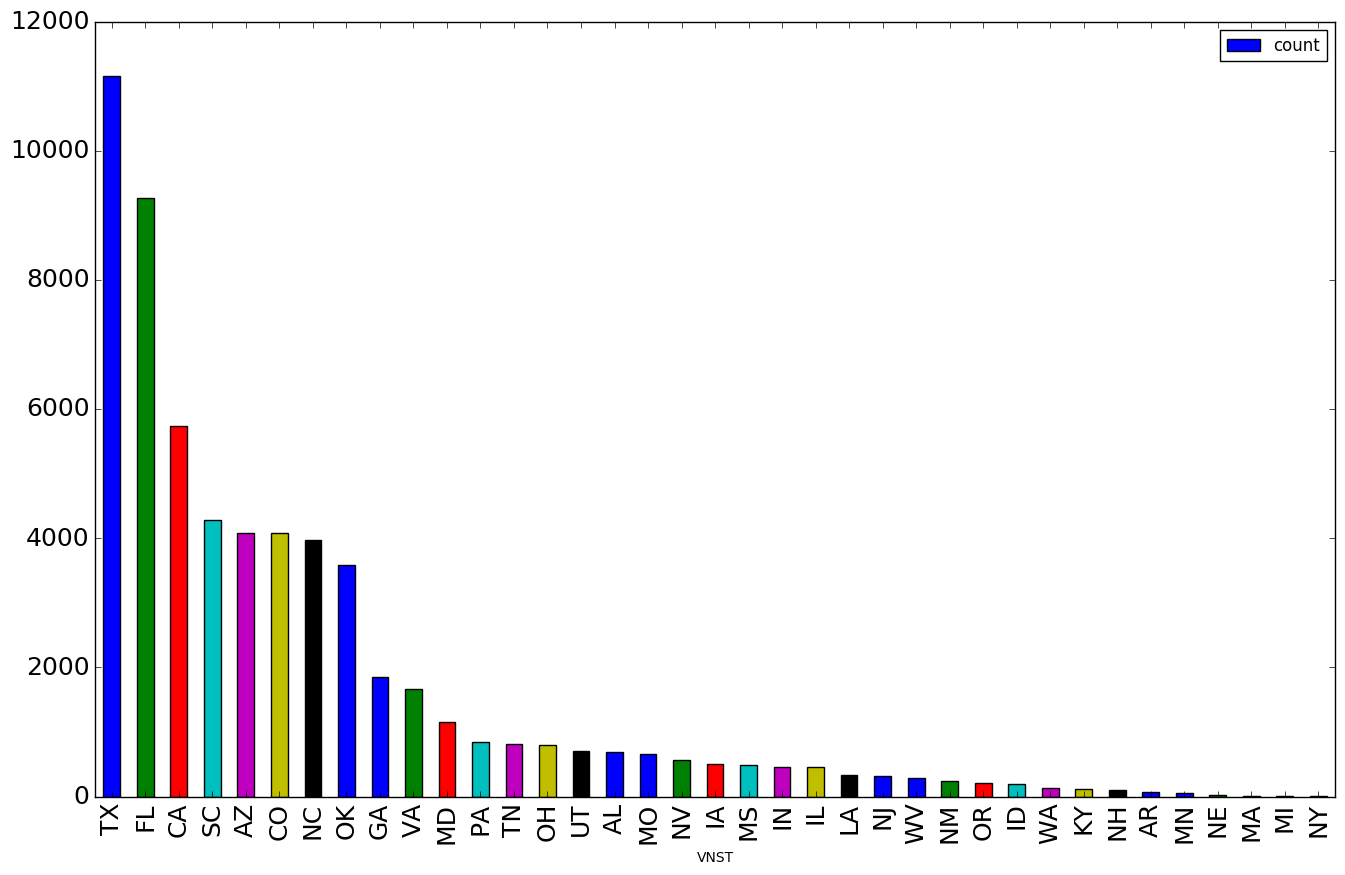

In [15]:
print(np.unique(data['VNST']))
print(len(np.unique(data['VNST'])))
data.groupby('VNST').count()[['IsBadBuy']].sort_values(
    'IsBadBuy', ascending=False).reset_index().rename(
    columns={'IsBadBuy': 'count'}).plot.bar(
    x='VNST', y='count', figsize=(16, 10), fontsize=18);